In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

total_data = pd.read_csv("/workspaces/machine-learning-python-template-ds-2023/data/raw/AB_NYC_2019.csv")
train_data = pd.DataFrame()
test_data = pd.DataFrame()

train_data, test_data = train_test_split(total_data,test_size=0.5)





In [2]:
print(train_data.shape)
print(train_data.head(3))


(24447, 16)
             id                                         name    host_id  \
28692  22193183  Bright bedroom with balcony in Williamsburg   23793668   
29898  23016550            Long term, bright studio Union Sq    2317952   
33469  26455093                         Presidential Comfort  198476726   

       host_name neighbourhood_group neighbourhood  latitude  longitude  \
28692   Annalise            Brooklyn  Williamsburg  40.71312  -73.95170   
29898  Anastacia           Manhattan      Gramercy  40.73573  -73.98755   
33469      Cathy              Queens  Far Rockaway  40.60395  -73.74904   

             room_type  price  minimum_nights  number_of_reviews last_review  \
28692     Private room     80               2                  4  2019-04-09   
29898  Entire home/apt    150              30                  5  2018-12-24   
33469     Private room     55               1                 27  2019-07-07   

       reviews_per_month  calculated_host_listings_count  availab

In [3]:
print(test_data.shape)
print(test_data.head(3))

(24448, 16)
             id                                              name   host_id  \
4701    3303382            Hamilton Heights - Private Guest Suite  16683574   
112       26559                  Beautiful Apartment East Village    112793   
43714  33828807  Cozy room in Brooklyn Safe Area. 30m to D,N/Town  92897185   

                  host_name neighbourhood_group neighbourhood  latitude  \
4701   Delphine And Michael           Manhattan        Harlem  40.82888   
112                   Sally           Manhattan  East Village  40.72880   
43714              Nikolett            Brooklyn  Borough Park  40.63402   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
4701   -73.94997  Entire home/apt    145               4                115   
112    -73.98192  Entire home/apt    140               7                 12   
43714  -74.00250     Private room     65               1                  9   

      last_review  reviews_per_month  calculated_host

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
print(total_data['id'].duplicated().sum())
print(total_data['name'].duplicated().sum())
print(total_data['host_id'].duplicated().sum())

0
989
11438


We'll drop irrelevant columns  

In [6]:
total_data.drop(["id","name","host_name","last_review"], axis = 1, inplace=True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Analysis of univariate variables

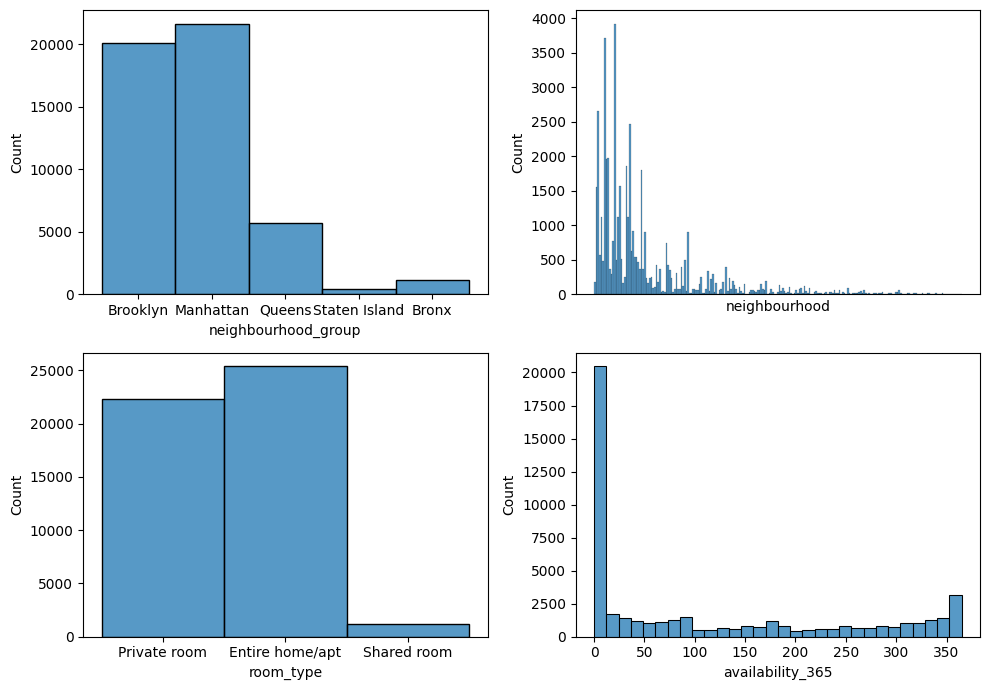

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,2, figsize = (10,7))

sns.histplot(ax = axis[0,0], data = total_data, x ="neighbourhood_group")
sns.histplot(ax = axis[0,1], data = total_data, x ="neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = total_data, x ="room_type")
sns.histplot(ax = axis[1,1], data = total_data, x ="availability_365")

plt.tight_layout()

plt.show()

Analysis of numeric variables

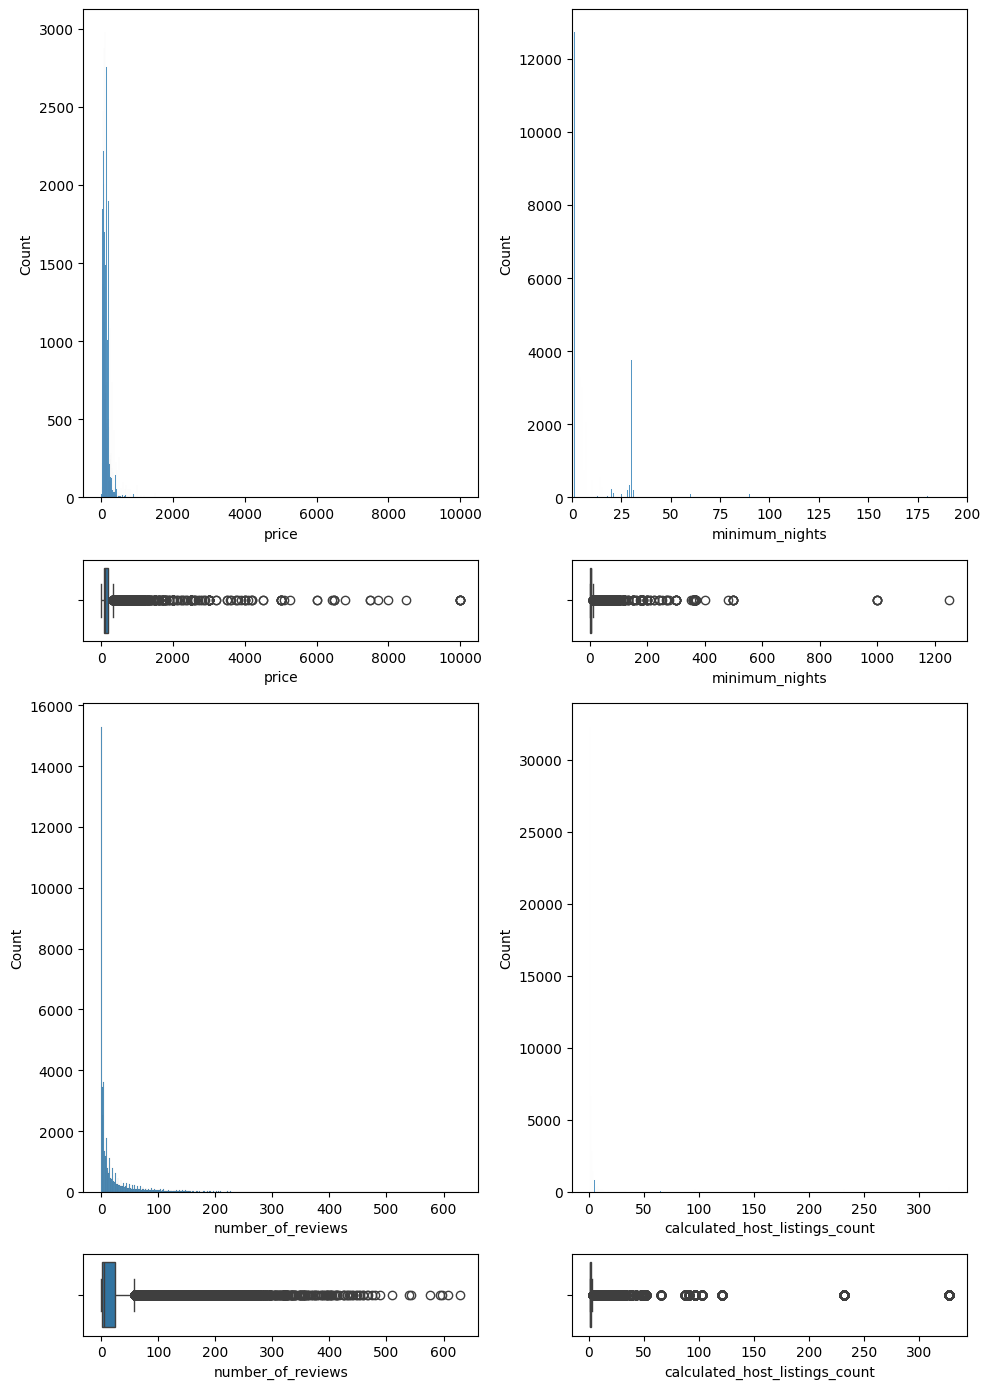

In [8]:
fig, axis = plt.subplots(4,2, figsize = (10,14), gridspec_kw={'height_ratios': [6,1,6,1]})

sns.histplot(ax = axis[0,0], data = total_data, x ="price")
sns.boxplot(ax = axis[1,0], data= total_data, x = "price")

sns.histplot(ax = axis[0,1], data = total_data, x ="minimum_nights").set_xlim(0,200)
sns.boxplot(ax = axis[1,1], data= total_data, x = "minimum_nights")

sns.histplot(ax = axis[2,0], data = total_data, x ="number_of_reviews")
sns.boxplot(ax = axis[3,0], data= total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x ="calculated_host_listings_count")
sns.boxplot(ax = axis[3,1], data= total_data, x = "calculated_host_listings_count")

plt.tight_layout()

plt.show()


Analysis of Multivariate Variables

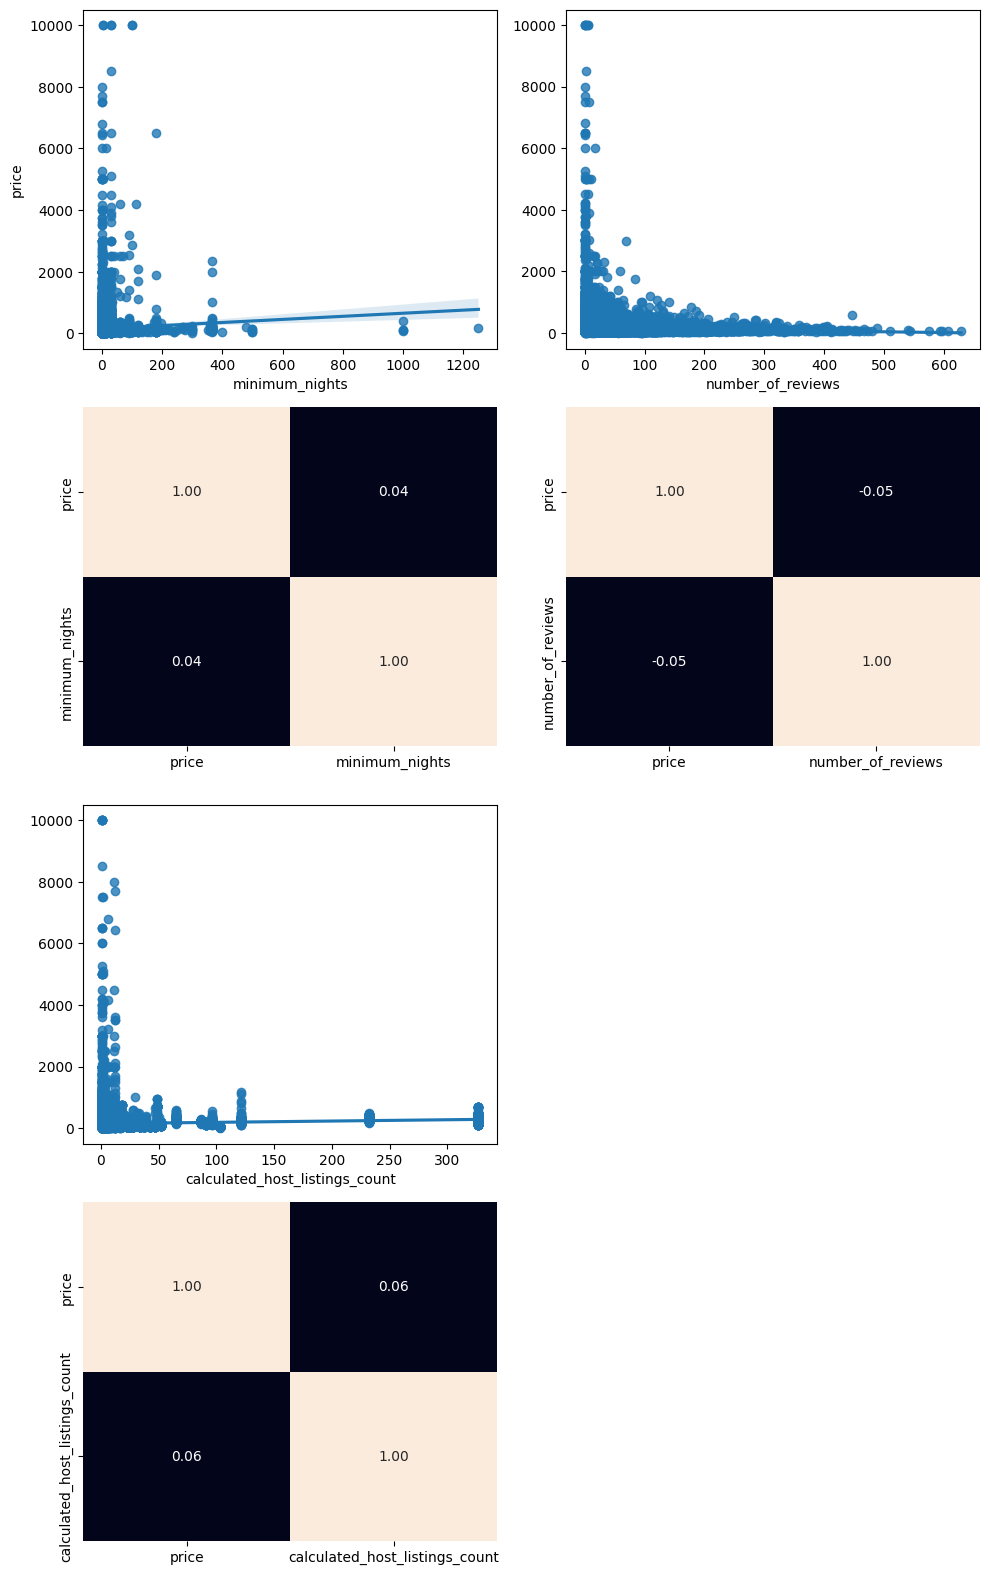

In [12]:
fig, axis = plt.subplots(4,2, figsize = (10,16))

sns.regplot(ax = axis[0,0], data = total_data, x= "minimum_nights", y= "price")
sns.heatmap(total_data[["price","minimum_nights"]].corr(), annot=True, fmt = ".2f",ax = axis[1,0], cbar= False)

sns.regplot(ax = axis[0,1], data = total_data, x= "number_of_reviews", y= "price").set(ylabel=None)
sns.heatmap(total_data[["price","number_of_reviews"]].corr(), annot=True, fmt = ".2f",ax = axis[1,1], cbar= False)

sns.regplot(ax = axis[2,0], data = total_data, x= "calculated_host_listings_count", y= "price").set(ylabel=None)
sns.heatmap(total_data[["price","calculated_host_listings_count"]].corr(), annot=True, fmt = ".2f",ax = axis[3,0], cbar= False)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()

plt.show()

Categorical-Categorical

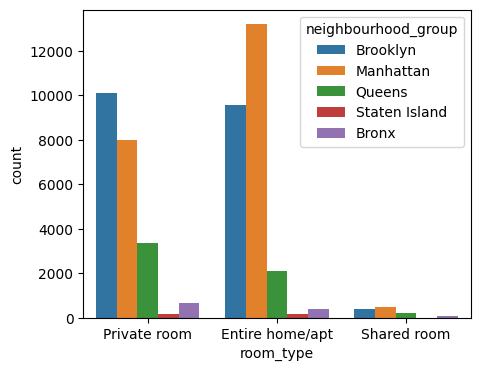

In [14]:
fig, axis = plt.subplots(figsize = (5,4))

sns.countplot(data = total_data, x = "room_type", hue= "neighbourhood_group")

plt.show()

Numerical - Categorical

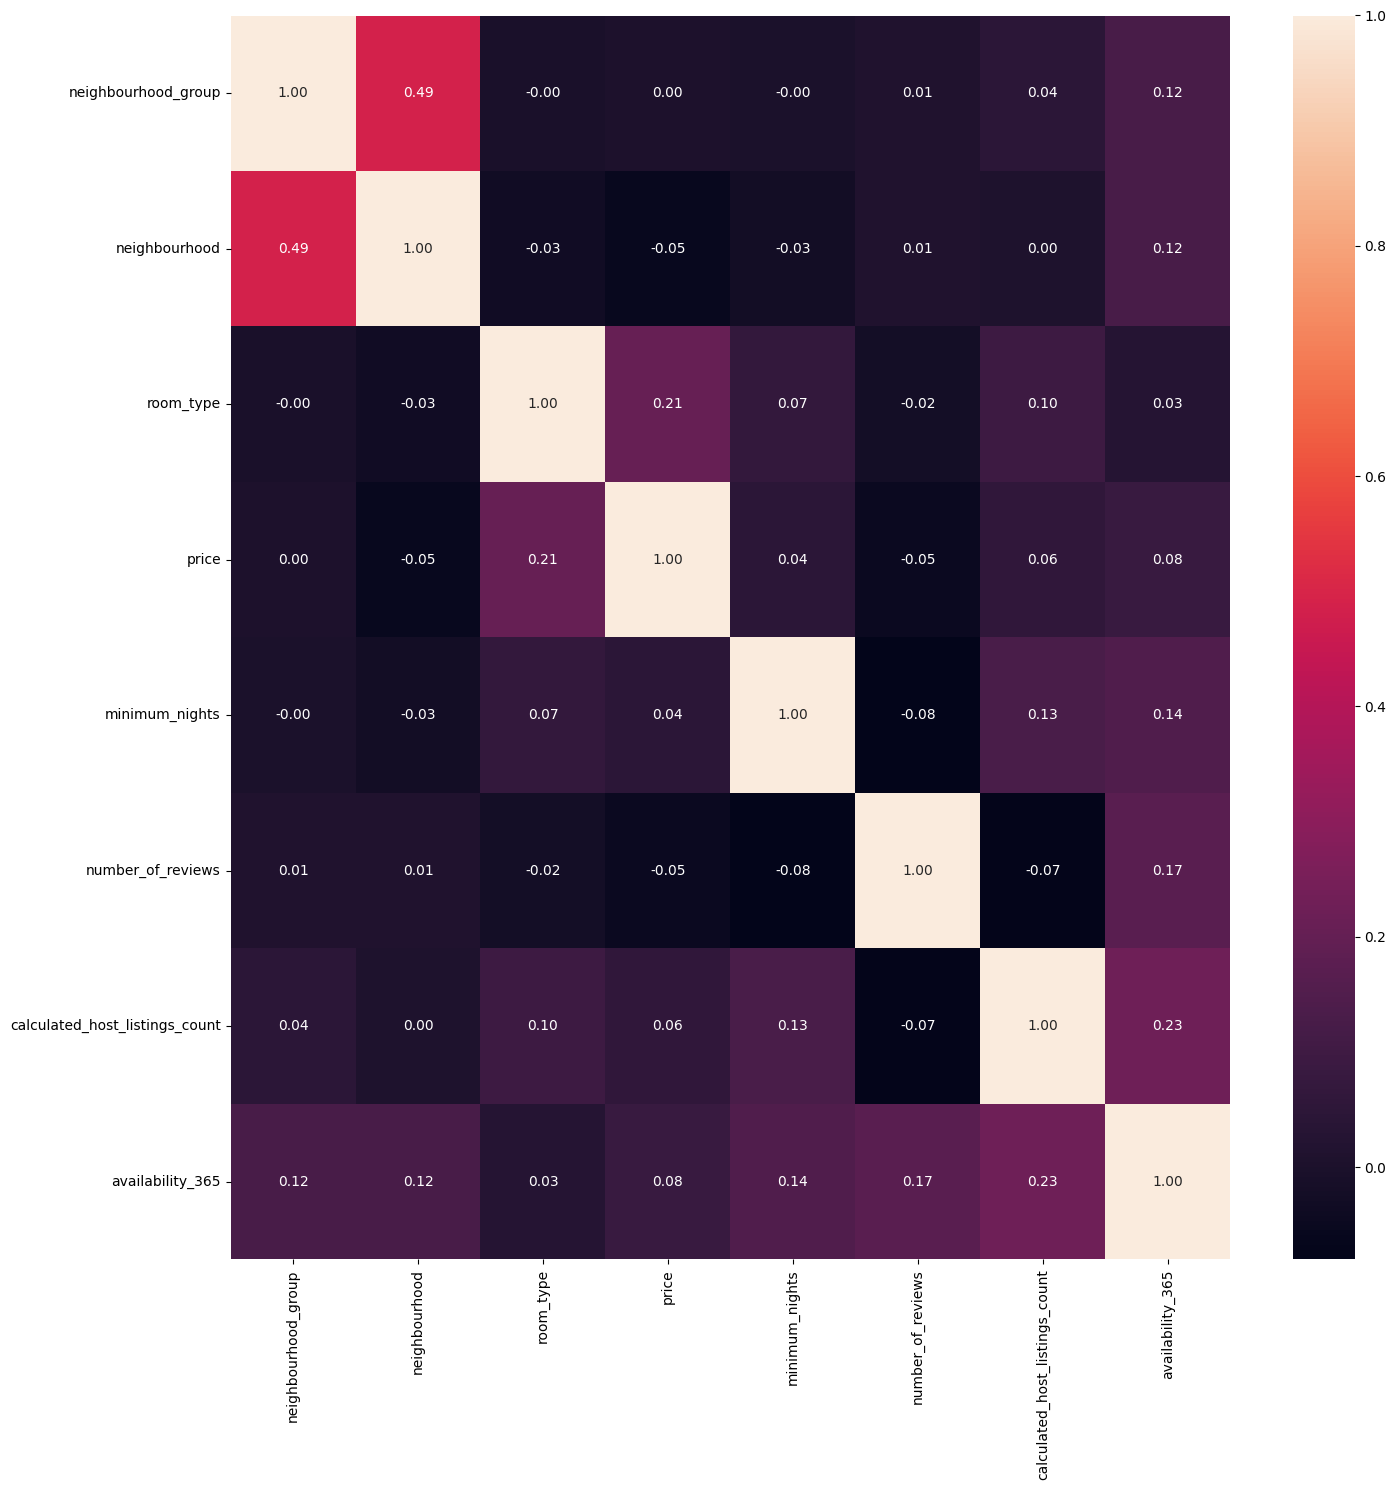

In [15]:
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()


plt.show()

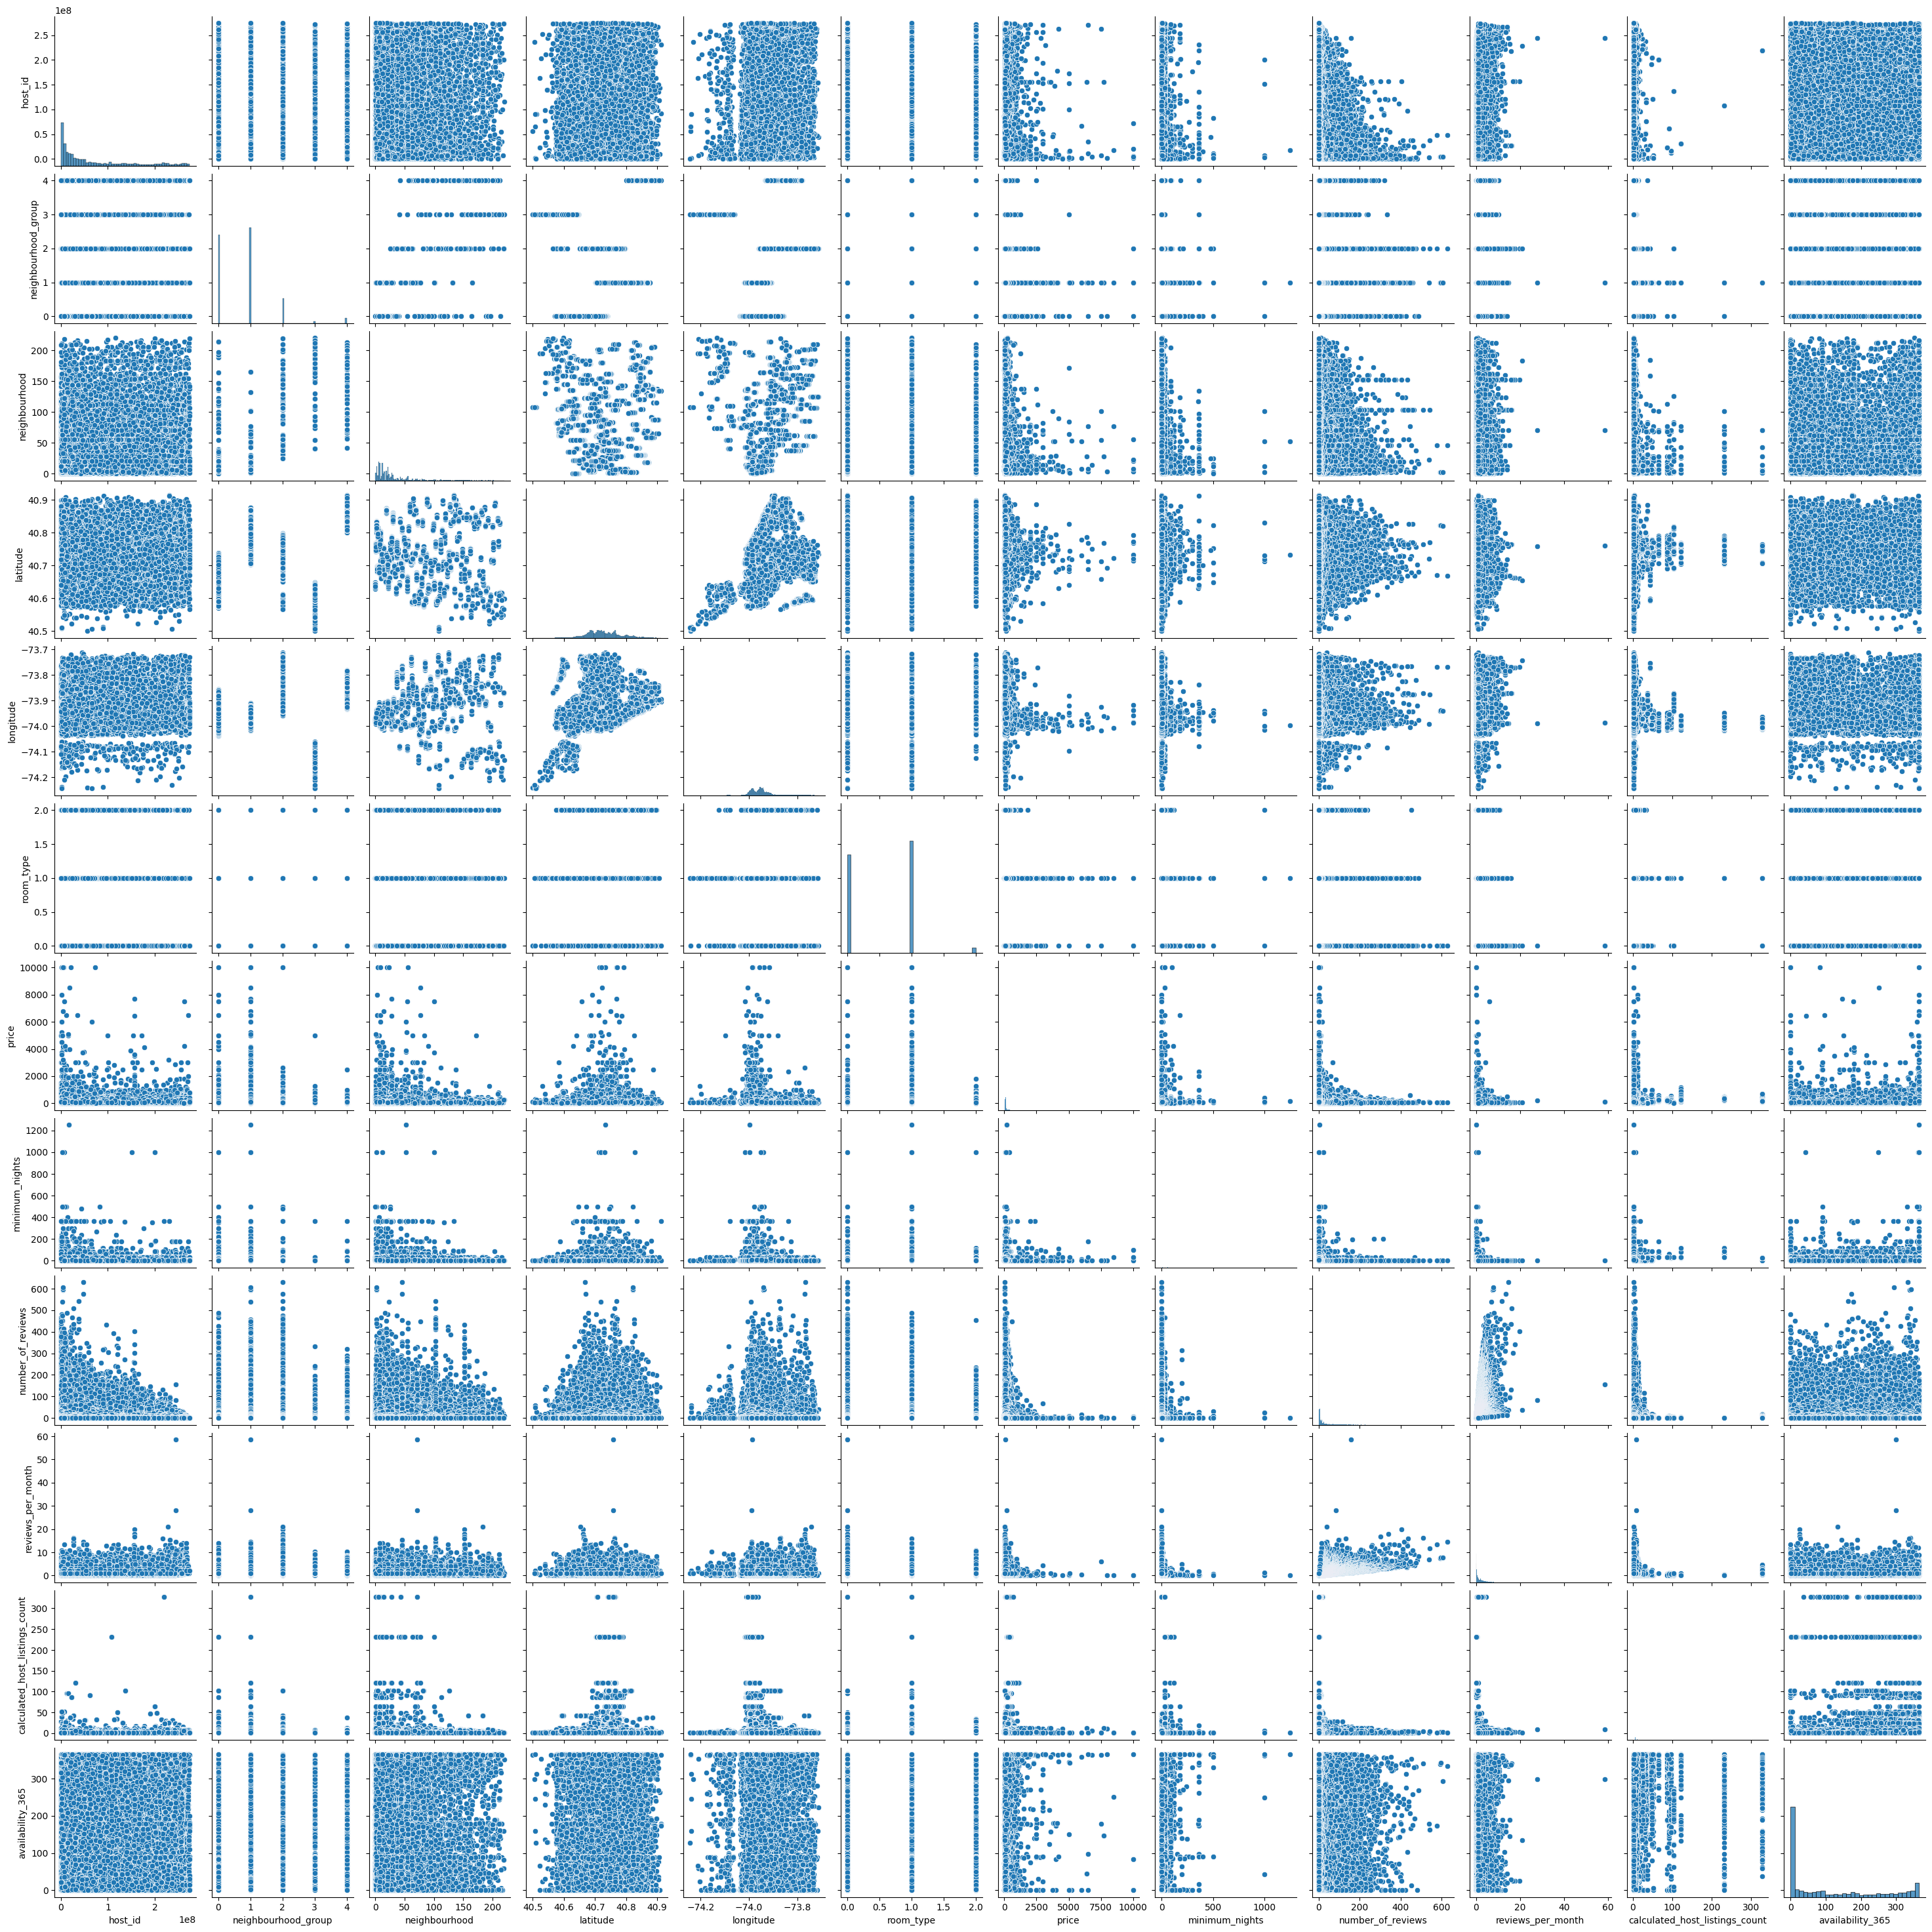

In [16]:
sns.pairplot(data = total_data)

Feature Engineering and Outlier Analysis

In [17]:
total_data.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "price")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "room_type")

plt.tight_layout()

plt.show()

Outlier Detection

In [ ]:
price_stats = total_data["price"].describe()
price_stats

In [ ]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

In [ ]:

total_data = total_data[total_data["price"] > 0]

count_0 = total_data[total_data["price"] == 0].shape[0]
count_1 = total_data[total_data["price"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

For Minimum Nights

In [ ]:
nights_stats = total_data["minimum_nights"].describe()
nights_stats

nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

total_data = total_data[total_data["minimum_nights"] <= 15]

count_0 = total_data[total_data["minimum_nights"] == 0].shape[0]
count_1 = total_data[total_data["minimum_nights"] == 1].shape[0]
count_2 = total_data[total_data["minimum_nights"] == 2].shape[0]
count_3 = total_data[total_data["minimum_nights"] == 3].shape[0]
count_4 = total_data[total_data["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

For number of reviews

In [ ]:
review_stats = total_data["number_of_reviews"].describe()
review_stats


In [ ]:
review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")

For calculated host listings count

In [ ]:
hostlist_stats = total_data["calculated_host_listings_count"].describe()
hostlist_stats

In [ ]:

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

count_04 = sum(1 for x in total_data["calculated_host_listings_count"] if x in range(0, 5))
count_1 = total_data[total_data["calculated_host_listings_count"] == 1].shape[0]
count_2 = total_data[total_data["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

In [ ]:
total_data = total_data[total_data["calculated_host_listings_count"] > 4]

Missing value analysis

In [ ]:
total_data.isnull().sum().sort_values(ascending = False)

Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
df_scal["price"] = total_data["price"]
df_scal.head()

Feature Selection


In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

Saving the completed data!

In [ ]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)